# Pandas学习教程

**Author Github: @deeptrial**

2021-04-01

East China Normal University

In [2]:
import pandas as pd
import numpy as np
import math

def separate():
    print("--------------------------------")

## Pandas的数据结构

Pandas具有~~3~~ 2种数据结构，分别是Series（系列），DataFrame（数据帧），~~Panel（面板）~~。三种数据结构均建立在numpy基础上，因此具有较好的执行效率。这些数据结构的特点如下:

- Series表示1维均匀数组，数组尺寸**不可变**，数据值可变
- DataFrame表示2维异构数组，数组尺寸可变，数据值可变
- ~~Panel表示表示3维异构数组，数组尺寸可变，数据值可变~~ 新版本已使用MultiIndex代替Panel

因此三种数据结构间的关系是：Series可组成DataFrame，~~DataFrame可组成Panel~~

## 1 Series

Series是Pandas的主要数据结构之一，是带标签的一维数组。理论上数组内的值的类型必须是统一的，但由于不同类型的数据在python中都可作为object，所以这一问题常被忽视。

Series结构在存储时分为两个部分（如图所示）：
- values：一维数组数据
- index：数据索引标签

特点：**数据对齐是内在的**，标签与数据默认对齐，除非特殊情况，一般不会断开连接，因此通过索引取值非常方便，不需要循环，可以直接通过字典方式，key 获取value

<img src="https://pic1.zhimg.com/v2-3c3e48377d299270579be01f6d9fb79c_b.jpg" width = "150" height = "100" alt="Series结构" align=center />

### 创建Series

Pandas系列可以使用以下构造函数创建：

```python
pandas.Series( data, index, dtype, copy)
```
- data: 数据形式，可以是numpy array，list, dictionary， constant
- index：索引值，默认的隐式数字索引：np.arange(n)，下标从0开始
- dtype: 数据类型，默认将自动推断
- copy：表示是否复制数据，默认False

In [25]:
# 创建Series
s1=pd.Series([11,3.5,2,5,12])  #从list创建,这里没有给出index，因此使用隐式索引
print("from list:\n",s1)
separate()

s2=pd.Series('',index=['a','b','c','d',4])   #从constant创建，依据index长度创建值相同的数组
print("from constant:\n",s2)
separate()

s3=pd.Series({'a':1,'b':2,'c':3,'d':4,'e':4})   #从dict创建 key变为index，value是数组数据
print("from dict:\n",s3)
separate()

s4 = pd.Series(np.random.randint(1,10,size=(4,)),index=['a','b','c','d'])
print("from array:\n",s4)
separate()

from list:
 0    11.0
1     3.5
2     2.0
3     5.0
4    12.0
dtype: float64
--------------------------------
from constant:
 a    
b    
c    
d    
4    
dtype: object
--------------------------------
from dict:
 a    1
b    2
c    3
d    4
e    4
dtype: int64
--------------------------------
from array:
 a    8
b    1
c    6
d    3
dtype: int64
--------------------------------


### Series切片和索引

Series的索引和切片提供了访问、修改Series部分数据的功能。
- #### **iloc** vs **loc**
 - iloc是通过隐式索引访问数据的操作，内部只能填写数字下标
 - loc是通过显式索引访问数据的操作，内部填写自定义的标签，可以是数字或字符串等

In [26]:
# 通过隐式索引访问数据
# 任何Series都可通过隐式索引访问数据
print("分别访问s1的第1行、第2行：",s1.iloc[1],s1.iloc[2])  #返回具体数值
print("同时访问s1的第1行、第2行：",s1.iloc[[1,2]])    # 返回Series切片
separate()

print("分别访问s3的第1行、第2行：",s3.iloc[1],s3.iloc[2])  #返回具体数值
print("同时访问s3的第1行、第2行：",s3.iloc[[1,2]])    # 返回Series切片
separate()


# 通过显式索引访问数据
# 对于自定义index的Series，可以直接通过指定index访问数据
# 对于没有自定义index的Series，可以直接指定index行号访问数据
print("分别访问s1的第1行、第2行：",s1[1],s1[2])  #返回具体数值
print("同时访问s1的第1行、第2行：",s1.loc[[1,2]])    # 返回Series切片
separate()

print("分别访问s3的第1行、第2行：",s3['b'],s3['c'])  #返回具体数值
print("同时访问s3的第1行、第2行：",s3.loc[['b','c']])    # 返回Series切片
separate()

分别访问s1的第1行、第2行： 3.5 2.0
同时访问s1的第1行、第2行： 1    3.5
2    2.0
dtype: float64
--------------------------------
分别访问s3的第1行、第2行： 2 3
同时访问s3的第1行、第2行： b    2
c    3
dtype: int64
--------------------------------
分别访问s1的第1行、第2行： 3.5 2.0
同时访问s1的第1行、第2行： 1    3.5
2    2.0
dtype: float64
--------------------------------
分别访问s3的第1行、第2行： 2 3
同时访问s3的第1行、第2行： b    2
c    3
dtype: int64
--------------------------------


### Series基本操作

Series的基本操作包括：
- #### 显式数据的头和尾

In [27]:
# 显式前n行
s1.head(2)

#显式末尾n行
#s1.tail(2)

0    11.0
1     3.5
dtype: float64

- #### 获取、修改index

Series数据结构在定义后无法改变数组的长度，但是可以修改index

In [19]:
#获取values，index
print(s4.values,s4.index)

#修改index
s4.index=['a','c','b','d']
print(s4)

[7 8 2 9] Index(['a', 'c', 'b', 'd'], dtype='object')
a    7
c    8
b    2
d    9
dtype: int64


- #### 显式统计信息

In [30]:
# 完整的统计信息
print(s1.describe())
separate()

# 显式指定信息
print("data type:",s1.dtype)
print("std:",s1.std())

count     5.000000
mean      6.700000
std       4.522168
min       2.000000
25%       3.500000
50%       5.000000
75%      11.000000
max      12.000000
dtype: float64
--------------------------------
data type: float64
std: 4.522167621838006


- #### 去重 unique

In [21]:
print(s3.unique()) 
print(s3)  #unique不会修改原始数据，且返回的是list结果

[1 2 3 4]
a    1
b    2
c    3
d    4
e    4
dtype: int64


- #### 判断缺失值
 - notnull()表示不为空返回True，为空返回False
 - isnull()表示不为空返回False，为空返回True

In [22]:
sp=pd.Series({'a':1,'b':2,'c':3,'d':4,'e':4},index=['a','b','c','d','f','p'])   #构造一个含有Nan的Series
print(sp)
separate()

print("isnull\n:",sp.isnull())
separate()

print("notnull\n:",sp.notnull())
separate()

print(sp[sp.notnull()]) #根据bool类型的Series访问数据，可提取非空数据或空数据

a    1.0
b    2.0
c    3.0
d    4.0
f    NaN
p    NaN
dtype: float64
--------------------------------
isnull
: a    False
b    False
c    False
d    False
f     True
p     True
dtype: bool
--------------------------------
notnull
: a     True
b     True
c     True
d     True
f    False
p    False
dtype: bool
--------------------------------
a    1.0
b    2.0
c    3.0
d    4.0
dtype: float64


- #### 标量运算

与标量的运算：

Pandas支持直接对Series进行运算，包括四则运算、条件判断、numpy内的函数运算

In [23]:
# 四则运算
print(s1+5)
print(s1*2)
print(s1/2)
print(s1-5)
separate()

# 条件判断
print(7 in s1)
print(s1>5)
separate()

# 函数运算
print(np.exp(s1)) #无法使用math计算 print(math.exp(s))
print(np.sqrt(s1))

0    16.0
1     8.5
2     7.0
3    10.0
4    17.0
dtype: float64
0    22.0
1     7.0
2     4.0
3    10.0
4    24.0
dtype: float64
0    5.50
1    1.75
2    1.00
3    2.50
4    6.00
dtype: float64
0    6.0
1   -1.5
2   -3.0
3    0.0
4    7.0
dtype: float64
--------------------------------
False
0     True
1    False
2    False
3    False
4     True
dtype: bool
--------------------------------
0     59874.141715
1        33.115452
2         7.389056
3       148.413159
4    162754.791419
dtype: float64
0    3.316625
1    1.870829
2    1.414214
3    2.236068
4    3.464102
dtype: float64


- #### Series的运算

Series与Series的运算包括四则运算、拼接

Series自生的运算包括删除、排序

In [24]:
#Series与Series运算
print("s3:\n",s3) 
separate()
print("s4:\n",s4)
separate()
print("s3+s4:\n",s3+s4) #支持四则运算，index相同的直接计算，无法匹配的保留并置为Nan
separate()


#Series与Series的拼接
s3=s3.append(pd.Series([8])) #添加的Series在没有指定index时，采用隐式index（0，1，2，...）
print("append:\n",s3)
separate()

#Series删除元素
#s3=s3.drop(0)          #drop中填写index，可以是隐式index，也可以是自定义的index
s3.drop(0,inplace=True) #inplace原地修改
print("del index 0:\n",s3)
separate()

#按照index大小排序
print(s4.sort_index(ascending = False))  #按照索引大小排序  不改变原始Series
print(s4.sort_values(ascending = False))  #按照值大小排序 

s3:
 a    1
b    2
c    3
d    4
e    4
dtype: int64
--------------------------------
s4:
 a    7
c    8
b    2
d    9
dtype: int64
--------------------------------
s3+s4:
 a     8.0
b     4.0
c    11.0
d    13.0
e     NaN
dtype: float64
--------------------------------
append:
 a    1
b    2
c    3
d    4
e    4
0    8
dtype: int64
--------------------------------
del index 0:
 a    1
b    2
c    3
d    4
e    4
dtype: int64
--------------------------------
d    9
c    8
b    2
a    7
dtype: int64
d    9
c    8
a    7
b    2
dtype: int64


## 2 DataFrame

DataFrame是pandas中的一个非常重要的二维数据结构。相比Series，在dataframe的每个维度上均存在index，如图所示：

<img src="https://pic1.zhimg.com/v2-b03baaccf0ca7ec26c97a979fc6540f0_b.jpg" width = "300" height = "250" alt="Series结构" align=center />

作为二维数据结构，DataFrame可用于表示数据表等。

### 创建DataFrame

pandas中的DataFrame可以使用以下构造函数创建:
```python
pandas.DataFrame( data, index, columns, dtype, copy)
```
- data: 数据形式，可以是numpy array，list, map,dictionary， constant,dataframe
- index：行标签，默认np.arange(n)
- columns：列标签，默认np.arange(n)
- dtype: 数据类型，默认将自动推断
- copy：表示是否复制数据，默认False


In [54]:
# 创建DataFrame
df3=pd.DataFrame([[1,'a',1],[2,'b',2],[3,'c',3],[4,'d',4]],columns=[0,1,2])  #从list创建dataframe
print(df3)
separate()

#从dict创建dataframe
#显式指定行的index时，需要使用Series数据结构
d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']), 'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}
df1 = pd.DataFrame(d)
print(df1)
separate()

d={'one':[1,2,3,4,5],"two":[2,3,4,5,6]} #使用隐式index
df = pd.DataFrame(d)
print(df)

   0  1  2
0  1  a  1
1  2  b  2
2  3  c  3
3  4  d  4
--------------------------------
   one  two
a  1.0    1
b  2.0    2
c  3.0    3
d  NaN    4
--------------------------------
   one  two
0    1    2
1    2    3
2    3    4
3    4    5
4    5    6


### DataFrame切分和索引

同Series结构一样，dataframe的索引和切片提供了访问、修改dataframe部分数据的功能。

#### **iloc** vs **loc** 初步
 - 对于二维数据，行列的顺序是：**df.iloc[行号,列号]和df.loc[行索引,列索引]**
 - iloc是通过隐式索引访问数据的操作，内部只能填写数字下标
 - loc是通过显式索引访问数据的操作，内部填写自定义的标签，可以是数字或字符串等
 - iloc[索引：索引]是左闭右开的，loc[索引：索引]是左闭右闭的
 - 对于默认index的dataframe而言，iloc和loc是一致的
 


In [55]:
#列选择
print('column select:',df[['one','two']]) #直接引用列名 df['one']也可以， 但df[列名：列名] 不可以
separate()

print('column select:',df.iloc[:,[0,1]])  #与上面是一致的
separate()

print('columns select:',df.loc[:,['one','two']]) #与上面是一致的
separate()


#行选择
print('select row',df1[0:1])  #直接引用行名 df[行索引：行索引] 可以   但df[0]不可以（能执行但意义不同，行号被转化为列名）
separate()

print('select row',df1.loc[['a','b']]) #与上面是一致的
separate()

print('select row',df1.iloc[[0,1]]) #与上面是一致的
separate()

column select:    one  two
0    1    2
1    2    3
2    3    4
3    4    5
4    5    6
--------------------------------
column select:    one  two
0    1    2
1    2    3
2    3    4
3    4    5
4    5    6
--------------------------------
columns select:    one  two
0    1    2
1    2    3
2    3    4
3    4    5
4    5    6
--------------------------------
select row    one  two
a  1.0    1
--------------------------------
select row    one  two
a  1.0    1
b  2.0    2
--------------------------------
select row    one  two
a  1.0    1
b  2.0    2
--------------------------------


#### iloc和loc的返回值

不同于Series，在dataframe中,[索引]与[[索引]]的返回值是不同的,具体而言：
- [索引] 返回Series结构
- [[索引]] 返回DataFrame结构
- [索引：索引] 返回DataFrame结构


In [56]:
#loc
print("[index]:",type(df1.loc['a']))
print("[index]:",type(df1.loc[['a']]))
print("[index]:",type(df1.loc['a':'b']))

#iloc
print("[index]:",type(df1.iloc[0]))
print("[index]:",type(df1.iloc[[0]]))
print("[index]:",type(df1.iloc[0:1]))

[index]: <class 'pandas.core.series.Series'>
[index]: <class 'pandas.core.frame.DataFrame'>
[index]: <class 'pandas.core.frame.DataFrame'>
[index]: <class 'pandas.core.series.Series'>
[index]: <class 'pandas.core.frame.DataFrame'>
[index]: <class 'pandas.core.frame.DataFrame'>


#### at vs iat
at与iat用于获取dataframe中的一个值，其中at与loc相似，iat与iloc相似

In [57]:
print(df1.at['a','one'])
print(df1.iat[0,0])

1.0
1.0


#### bool表达式作为索引

In [58]:
print(df1[df1<2]) #返回一个dataframe，True的部分保留原值，False部分为NaN
separate()
#单列
print(df1['one']>2) #返回一个Series
print(df1[df1['one']>2]) #保留判断为True的行（包含所有列）
separate()
#多列
print(df1[['one','two']]>2) #返回一个dataframe
print(df1[df1[['one','two']]>2]) #返回一个dataframe，True的部分保留原值，False部分为NaN

   one  two
a  1.0  1.0
b  NaN  NaN
c  NaN  NaN
d  NaN  NaN
--------------------------------
a    False
b    False
c     True
d    False
Name: one, dtype: bool
   one  two
c  3.0    3
--------------------------------
     one    two
a  False  False
b  False  False
c   True   True
d  False   True
   one  two
a  NaN  NaN
b  NaN  NaN
c  3.0  3.0
d  NaN  4.0


### DataFrame基本操作

Series中的操作如 head tail describe 等都可以使用，以下对一些特别的操作做出说明：


#### 去除重复项
```
DataFrame.drop_duplicates(subset=None, keep='first', inplace=False)
```
- subset : column label or sequence of labels, optional 用来指定特定的列，默认所有列
- keep : {‘first’, ‘last’, False}, default ‘first’ 删除重复项并保留第一次出现的项
- inplace : boolean, default False 是直接在原来数据上修改还是保留一个副本


In [133]:
print(df1)
separate()
print(df1.drop_duplicates())

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
--------------------------------
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3


#### 添加/修改行或列

In [59]:
#添加列
df1["three"]=3
print(df1)
separate()

#修改列
df1["one"]=1
print(df1)
separate()

#添加行
df1.loc['e']=5
print(df1)
separate()

#修改行
df1.loc['e']=7
print(df1)

   one  two  three
a  1.0    1      3
b  2.0    2      3
c  3.0    3      3
d  NaN    4      3
--------------------------------
   one  two  three
a    1    1      3
b    1    2      3
c    1    3      3
d    1    4      3
--------------------------------
   one  two  three
a    1    1      3
b    1    2      3
c    1    3      3
d    1    4      3
e    5    5      5
--------------------------------
   one  two  three
a    1    1      3
b    1    2      3
c    1    3      3
d    1    4      3
e    7    7      7


#### 删除行或列

In [60]:
#删除方法1
del df1["three"]  #只能删除列
print(df1)

#删除方法2 （推荐方法）
df1=df1.drop('a',axis=0,inplace=False) #inplace=True时为原地修改
## 对于二维的DataFrame有时需要删除行或列，可以使用axis指定，axis=1 删除列 axis=0 删除行
print(df1)

#删除方法3
#delCol=df1.pop("three") #返回删除的列 原地修改  只能删除列

   one  two
a    1    1
b    1    2
c    1    3
d    1    4
e    7    7
   one  two
b    1    2
c    1    3
d    1    4
e    7    7


KeyError: 'three'

#### set_index与reset_index

set_index将某列指定为行index

reset_index 将现有index变为一列，新的index从0开始编号

In [70]:
print(df1)
separate()

idx_frame=df1.set_index('one')
print(idx_frame)  #此时列名b已不存在，b变为行index的名称
separate()

print(idx_frame.reset_index()) #恢复的dataframe index变成默认的数字标号

   one  two
b    1    2
c    1    3
d    1    4
e    7    7
--------------------------------
     two
one     
1      2
1      3
1      4
7      7
--------------------------------
   one  two
0    1    2
1    1    3
2    1    4
3    7    7


#### 连接函数

pandas中含有四种连接函数，分别是merge，join，concat，append

|函数|适用场景|调用方法|备注|
|----|:-------:|:--------:|---|
|.concat()|可用于两个或多个df间行方向（增加行，下同）或列方向（增加列，下同）进行内联或外联拼接操作，默认行拼接，取并集|result = pd.concat( [df1,df4], axis=1 )|提供了参数axis设置行/列拼接的方向|
|.merge()|可用于两个df间行方向（一般用join代替）或列方向的拼接操作，默认列拼接，取交集（即：存在相同主键的df1和df2的列拼接）|result=pd.merge(df1, df2,how=‘left’)|提供了类似于SQL数据库连接操作的功能，支持左联、右联、内联和外联等全部四种SQL连接操作类型|
|.join()|可用于df间列方向的拼接操作，默认左列拼接，how=’left’|df1.join(df2)|支持左联、右联、内联和外联四种操作类型|
|.append()|可用于df间行方向的拼接操作，默认|||


##### merge
```
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
         
dataframe.merge(right,how,...)

```
- left: 拼接的左侧DataFrame对象
- right: 拼接的右侧DataFrame对象
- on: 要加入的列或索引级别名称。 必须在左侧和右侧DataFrame对象中找到。 如果未传递且left_index和right_index为False，则DataFrame中的列的交集将被推断为连接键。
- left_on:左侧DataFrame中的列或索引级别用作键。 可以是列名，索引级名称，也可以是长度等于DataFrame长度的数组。
- right_on: 左侧DataFrame中的列或索引级别用作键。 可以是列名，索引级名称，也可以是长度等于DataFrame长度的数组。
- left_index: 如果为True，则使用左侧DataFrame中的索引（行标签）作为其连接键。 对于具有MultiIndex（分层）的DataFrame，级别数必须与右侧DataFrame中的连接键数相匹配。
- right_index: 与left_index功能相似。
- how: 连接方式 **'left', 'right', 'outer', 'inner', default: 'inner'**
- sort: 按字典顺序通过连接键对结果DataFrame进行排序。 默认为True，设置为False将在很多情况下显着提高性能。
- suffixes: 用于重叠列的字符串后缀元组。 默认为（‘x’，’ y’）。
- copy: 始终从传递的DataFrame对象复制数据（默认为True），即使不需要重建索引也是如此。
- indicator:将一列添加到名为_merge的输出DataFrame，其中包含有关每行源的信息。 _merge是分类类型，
    - 对于其合并键仅出现在“左”DataFrame中的观察值，取得值为left_only，
    - 对于其合并键仅出现在“右”DataFrame中的观察值为right_only，
    - 如果在两者中都找到观察点的合并键，则为both。


In [103]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3','K4'],
                       'A': ['A0', 'A1', 'A2', 'A3','A4'],
                       'B': ['B0', 'B1', 'B2', 'B3','B4']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']})
result = pd.merge(left, right,left_index=True,right_index=True,how="outer")  #相当于在行方向添加
print(result)
separate()

result = pd.merge(left, right,on="key",how="outer",indicator=True)  #相当于在行方向添加
print(result)

  key_x   A   B key_y    C    D
0    K0  A0  B0    K0   C0   D0
1    K1  A1  B1    K1   C1   D1
2    K2  A2  B2    K2   C2   D2
3    K3  A3  B3    K3   C3   D3
4    K4  A4  B4   NaN  NaN  NaN
--------------------------------
  key   A   B    C    D     _merge
0  K0  A0  B0   C0   D0       both
1  K1  A1  B1   C1   D1       both
2  K2  A2  B2   C2   D2       both
3  K3  A3  B3   C3   D3       both
4  K4  A4  B4  NaN  NaN  left_only


##### join
通过索引或者指定的列连接两个DataFrame 与数据库中join的用法一摸一样
```
DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)
```
- other: DataFrame，或者**带有名字**的Series，或者DataFrame的list。如果传递的是Series，那么其name属性应当是一个集合，并且该集合将会作为结果DataFrame的列名
- on: 列名称，或者列名称的list/tuple，或者类似形状的数组 表示连接的列，**默认使用索引连接**
- how: 连接方式 **'left', 'right', 'outer', 'inner', default: 'left'**
- lsuffix: "string"类型 左DataFrame中重复列的后缀
- rsuffix: "string"类型 右DataFrame中重复列的后缀
- sort: "bool" 类型 default False 按照字典顺序对结果在连接键上排序。如果为False，连接键的顺序取决于连接类型（关键字）。

当需要join的数据是DataFrame的list时，不支持传递参数on，lsuffix，sort

数据库中的连接定义：
- left join （左连接）：返回包括左表中的所有记录和右表中连接字段相等的记录。
- right join （右连接）：返回包括右表中的所有记录和左表中连接字段相等的记录。
- inner join （等值连接或者叫内连接）：只返回两个表中连接字段相等的行。
- outer join （全外连接）：返回左右表中所有的记录和左右表中连接字段相等的记录。


In [89]:
caller = pd.DataFrame({'key':['K2', 'K3', 'K0', 'K1', 'K4', 'K5'], 'A':['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})
other = pd.DataFrame({'key':['K0', 'K1', 'K2','K99'], 'B':['B0', 'B1', 'B2', 'B99']})
print(caller)
print(other)
#通过索引连接
print(caller.join(other,lsuffix='_caller', rsuffix='_other'))
separate()

#通过列key连接
print(caller.join(other.set_index('key'), on="key", how='inner'))  #需要先将连接的列设置为index
separate()

#sort的效果
print(caller.join(other.set_index('key'), on="key", how='inner',sort=True))

  key   A
0  K2  A0
1  K3  A1
2  K0  A2
3  K1  A3
4  K4  A4
5  K5  A5
   key    B
0   K0   B0
1   K1   B1
2   K2   B2
3  K99  B99
  key_caller   A key_other    B
0         K2  A0        K0   B0
1         K3  A1        K1   B1
2         K0  A2        K2   B2
3         K1  A3       K99  B99
4         K4  A4       NaN  NaN
5         K5  A5       NaN  NaN
--------------------------------
  key   A   B
0  K2  A0  B2
2  K0  A2  B0
3  K1  A3  B1
--------------------------------
  key   A   B
2  K0  A2  B0
3  K1  A3  B1
0  K2  A0  B2


##### concat
```
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True) 
```
- objs：series，dataframe或者是panel对象构成的序列list
- axis：指明连接的轴向， {0/’index’（行）, 1/’columns’（列）}，默认为0
- join：指明连接方式 ， {‘inner’（交集）, ‘outer（并集）’}，默认为outer
- join_axes：自定义的索引。指明用其他n-1条轴的索引进行拼接， 而非默认join =’ inner’或’outer’方式拼接
- keys：创建层次化索引。可以是任意值的列表或数组、元组数组、数组列表（如果将levels设置成多级数组的话）
- ignore_index=True：重建索引


In [105]:
df1=pd.DataFrame({'A':['A0','A1','A2','A3'],'B':['B0','B1','B2','B3'],
                  'C':['C0','C1','C2','C3'],'D':['D0','D1','D2','D3']},
                index=[0,1,2,3])
#样集2
df2=pd.DataFrame({'A':['A4','A5','A6','A7'],'B':['B4','B5','B6','B7'],
                  'C':['C4','C5','C6','C7'],'D':['D4','D5','D6','D7']},
                  index=[4,5,6,7])   
#样集3
df3=pd.DataFrame({'A':['A8','A9','A10','A11'],'B':['B8','B9','B10','B11'],
                  'C':['C8','C9','C10','C11'],'D':['D8','D9','D10','D11']},
                index=[8,9,10,11])   
#样集4
df4=pd.DataFrame({'B':['B2','B3','B6','B7'],'D':['D2','D3','D6','D7'],
                  'F':['F2','F3','F6','F7']},index=[2,3,6,7])
#样集1、2、3、4详见图1.1（a）                                                             
#列名（columns）相同，行索引（index）无重复项的表df1、df2、df3实现行拼接
frames = [df1, df2, df3]
result=pd.concat(frames)                      
print(result)
separate()

#使用参数key可以为每个数据集指定块标记
result=pd.concat(frames,keys=[ 'x','y','z' ])   
print(result)
separate()

      A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11
--------------------------------
        A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11
--------------------------------


##### append
append方法时concat方法的简略形式，只能在行方向上合并
```
DataFrame.append(other, ignore_index=False, verify_integrity=False, sort=None)
```

- other: series，dataframe或者是panel对象构成的序列list
- ignore_index : 设为True以重建索引
- verify_integrity : 检查index是否含重复值，重复会报错
- sort: 排序
只是join方法默认为左外连接how=’left’

In [108]:
df1=pd.DataFrame({'A':['A0','A1','A2','A3'],'B':['B0','B1','B2','B3'],
                  'C':['C0','C1','C2','C3'],'D':['D0','D1','D2','D3']},
                index=[0,1,2,3])
#样集2
df2=pd.DataFrame({'A':['A4','A5','A6','A7'],'B':['B4','B5','B6','B7'],
                  'C':['C4','C5','C6','C7'],'D':['D4','D5','D6','D7']},
                  index=[4,5,6,7])   

result=df1.append(df2)                      
print(result)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7


#### Groupby分组
将数据根据某个（多个）字段划分为不同的群体（group）进行分析。
```
DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, **kwargs)
```
- by：字段，可以是字符串，Series，字典，函数
- as_index: 是否将字段作为index，True时会生成multiindex dataframe

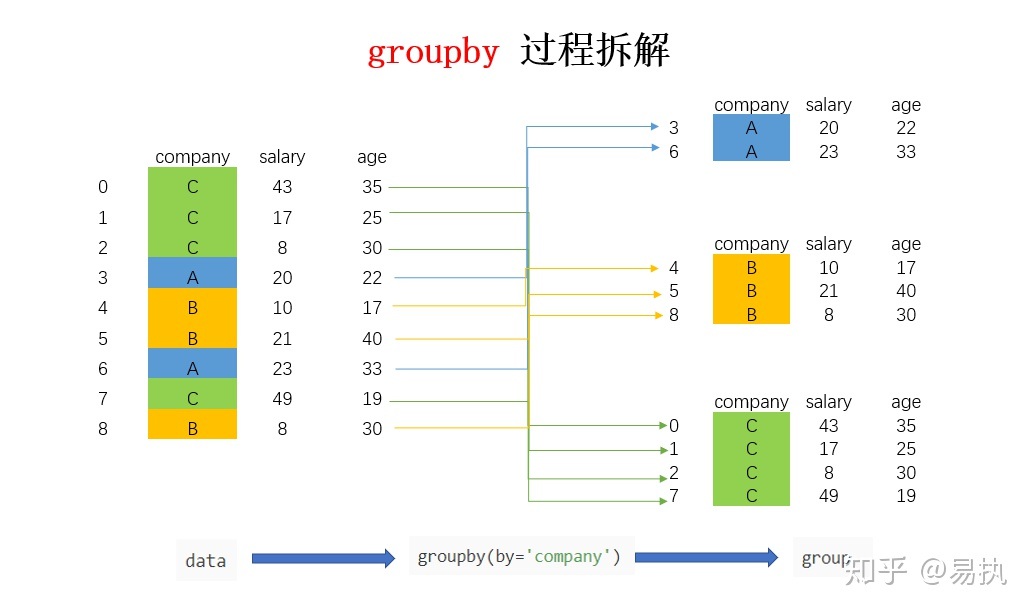

In [132]:
company=["A","B","C"]

data=pd.DataFrame({
    "company":[company[x] for x in np.random.randint(0,len(company),10)],
    "salary":np.random.randint(5,50,10),
    "age":np.random.randint(15,50,10)
}
)
print(data)
separate()

group = data.groupby("company",axis=0) #无法直接输出查看 返回值是DataFrameGroupBy对象
print(list(group))  #转为list后可以查看

  company  salary  age
0       C      32   23
1       C      11   32
2       B      20   33
3       C      21   48
4       A      11   23
5       A      18   37
6       A      17   42
7       A      45   29
8       C      41   44
9       B      23   36
--------------------------------
[]


##### agg聚合操作

聚合操作是groupby后非常常见的操作，聚合操作可以用来求和、均值、最大值、最小值等，下面的表格列出了Pandas中常见的聚合操作。

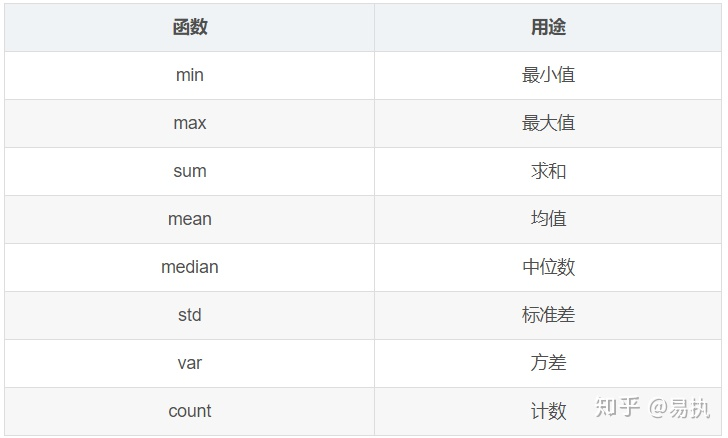


聚合操作是在groupby之后的每个子dataframe上单独进行的，如图所示：
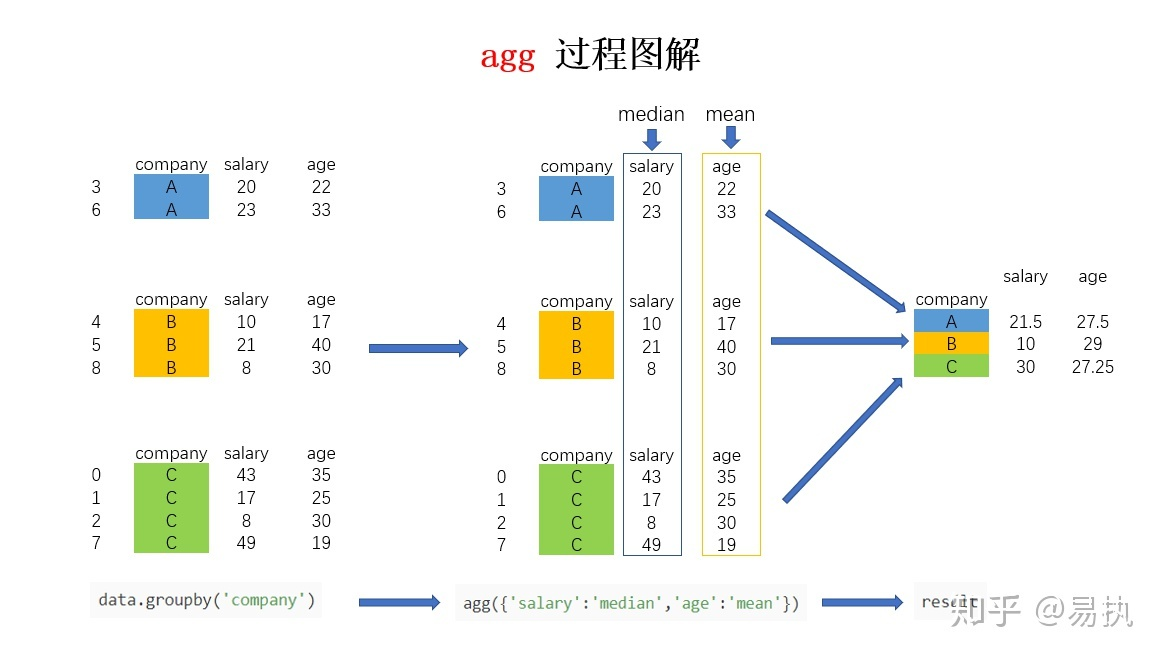

In [129]:
print(data.groupby("company").agg('mean'))

print(data.groupby("company").agg({'salary':'median','age':'mean'})) #对针对不同的列求不同的值，可使用字典指定

print(data.groupby("company").agg({'salary':['median',"mean",'max'],'age':'mean'})) #也可以对单列处理多个指标 用list表示

         salary        age
company                   
A          28.0  43.666667
B          30.4  30.800000
C          44.0  32.500000
         salary        age
company                   
A            26  43.666667
B            29  30.800000
C            44  32.500000
        salary                  age
        median  mean max       mean
company                            
A           26  28.0  46  43.666667
B           29  30.4  49  30.800000
C           44  44.0  47  32.500000


##### transform操作

对agg而言，会计算得到每个子dataframe的统计量并返回，但对transform而言，则会对每一条数据求得相应的结果，同一组内的样本会有相同的值，组内求完统计量后会按照原索引的顺序返回结果，如果有不理解的可以拿这张图和agg那张对比一下。

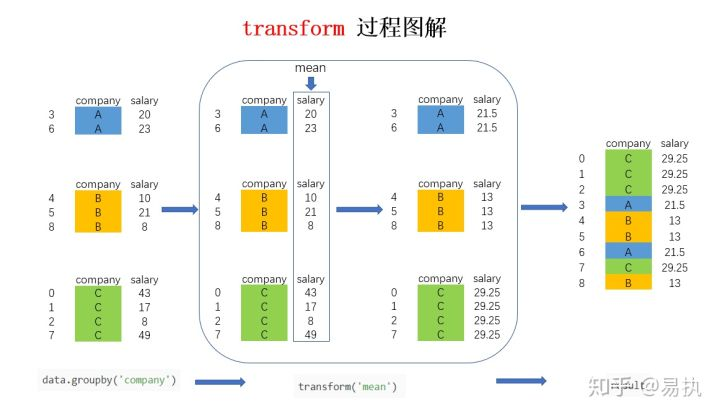

In [123]:
print(data.groupby('company')['salary'].transform('mean'))
separate()

#不能像agg那样传入dict
#print(data.groupby('company')['salary'].transform({'salary':'median','age':'mean'}))

0    30.4
1    30.4
2    44.0
3    30.4
4    44.0
5    30.4
6    30.4
7    28.0
8    28.0
9    28.0
Name: salary, dtype: float64
--------------------------------


##### apply操作
相比agg和transform而言更加灵活，能够传入任意自定义的函数，实现复杂的数据操作。apply内使用的自定义函数以子dataframe为输出进行处理。

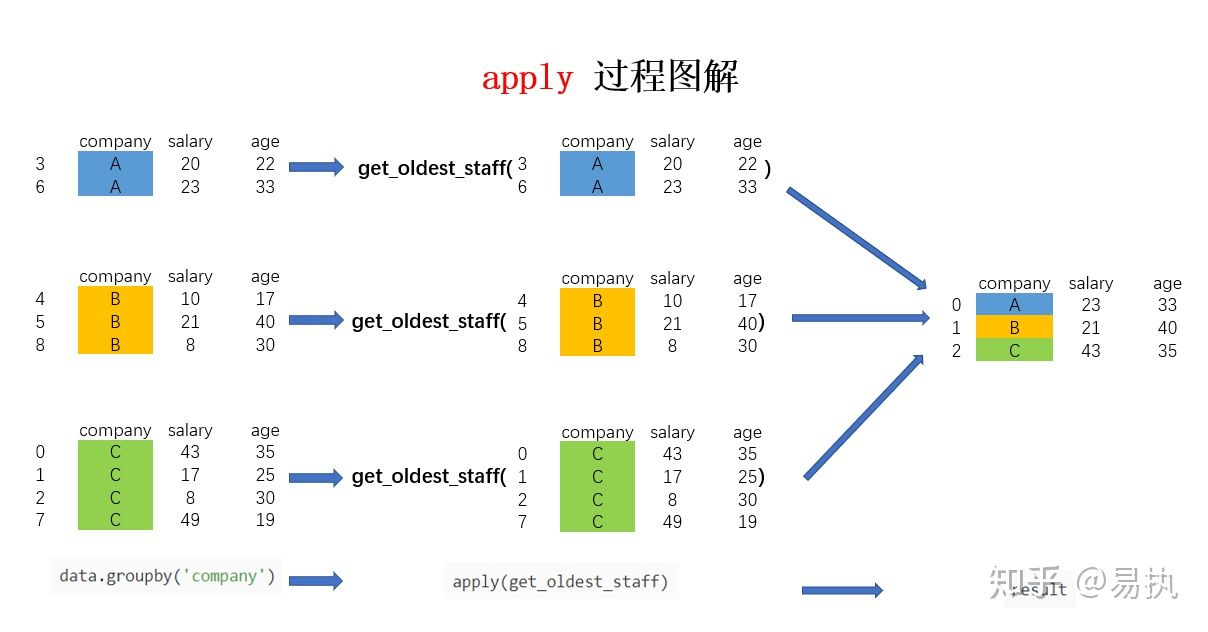

In [127]:
def get_oldest_staff(x):   #x代表传入的子dataframe
    df = x.sort_values(by = 'age',ascending=True)
    return df.iloc[-1,:]

print(data.groupby('company',as_index=False).apply(get_oldest_staff))

  company  salary  age
0       A      26   48
1       B      29   47
2       C      41   33


## 3 ~~Panel~~ MultiIndex

Panel主要用于三维数据，但在实际中，高维数据常使用多层级索引MultiIndex表示，操作更加灵活，可以表示3维，甚至更高维的数据。因此在新版Pandas中，panel已被移除

In [147]:
p=pd.DataFrame(np.random.randint(50,100,size=(4,4)),columns=pd.MultiIndex.from_product([["math","physics"],["term1","term2"]]),index=pd.MultiIndex.from_tuples([("class1","LiLei"),("class1","HanMeimei"),("class2","DaChun"),("class2","RuHua")]))
print(p)

p.index.names=["class","names"]
print(p)

# MultiIndex索引
print(p["math"]["term1"])
print(p.loc["class1"])

                  math       physics      
                 term1 term2   term1 term2
class1 LiLei        68    67      83    73
       HanMeimei    76    83      70    97
class2 DaChun       84    95      55    72
       RuHua        81    75      55    56
                  math       physics      
                 term1 term2   term1 term2
class  names                              
class1 LiLei        68    67      83    73
       HanMeimei    76    83      70    97
class2 DaChun       84    95      55    72
       RuHua        81    75      55    56
class   names    
class1  LiLei        68
        HanMeimei    76
class2  DaChun       84
        RuHua        81
Name: term1, dtype: int32
           math       physics      
          term1 term2   term1 term2
names                              
LiLei        68    67      83    73
HanMeimei    76    83      70    97
